In [498]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

#### 1. Data Understanding

In [8]:
dfCoupons = pd.read_csv('data/coupons.csv')

In [10]:
dfCoupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [610]:
dfCoupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [612]:
dfCoupons.shape

(12684, 26)

##### 1.1 Data Understanding Visualization (Before Cleaning)

Y
1    7210
0    5474
Name: count, dtype: int64


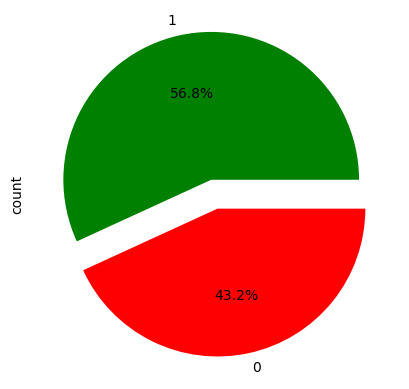

In [614]:
dfCoupons['Y'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'])
print(dfCoupons['Y'].value_counts())

Text(0.5, 1.0, 'coupon Vs Acceptance')

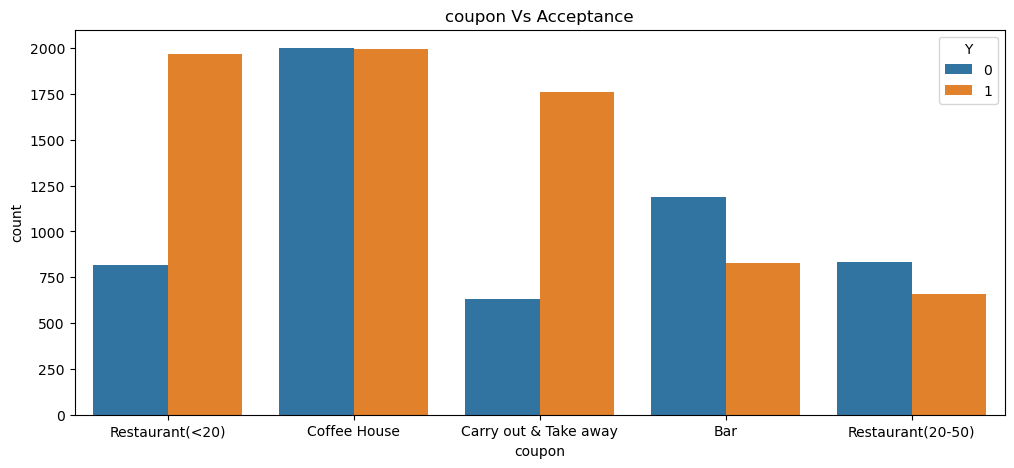

In [616]:
plt.figure(figsize=(12,5))
sns.countplot(x='coupon', hue='Y', data=dfCoupons)
plt.title('coupon Vs Acceptance')

Text(0.5, 1.0, 'Gender Vs Age')

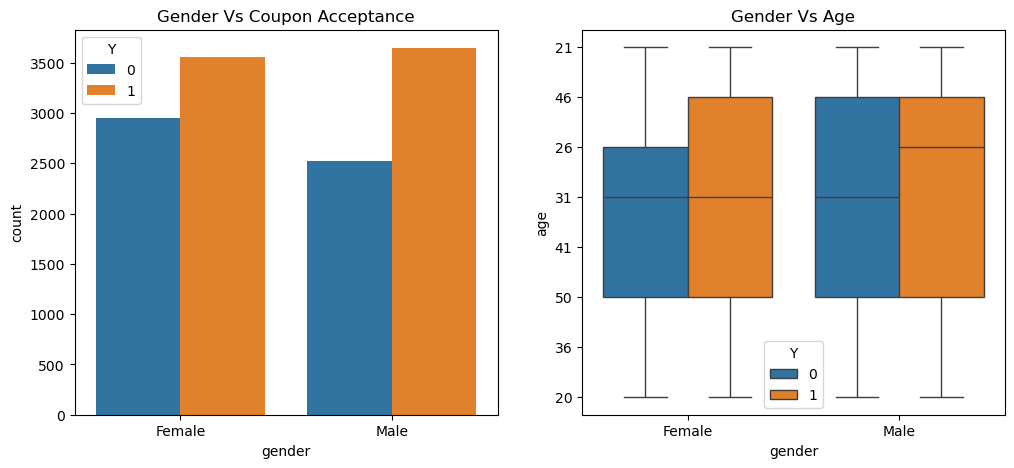

In [618]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.countplot(x='gender', hue='Y', data=dfCoupons)
plt.title('Gender Vs Coupon Acceptance')

plt.subplot(122)
sns.boxplot(x=dfCoupons['gender'],y=dfCoupons['age'],hue='Y',data=dfCoupons)
plt.title('Gender Vs Age')

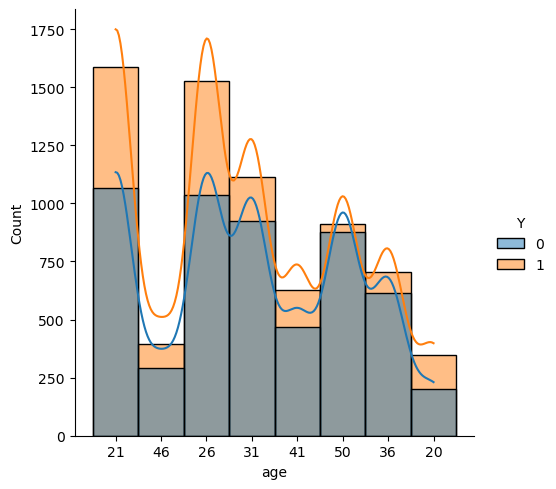

In [620]:
sns.displot(data=dfCoupons, x=dfCoupons['age'], hue='Y', kde=True)

#### 2. Data Preparation

##### Investigate the dataset for missing or problematic data.

#### 2.1 Null Value analysis

In [192]:
missing_summary = dfCoupons.isnull().sum()
print("Missing Values Summary:\n", missing_summary)

Missing Values Summary:
 destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [116]:
dfNull = dfCoupons.isnull().sum()

In [118]:
dfNull[dfNull != 0]

car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
dtype: int64

#### 2.2 Duplicates

In [129]:
dfCoupons.duplicated().sum()

74

In [131]:
dfDuplicate = dfCoupons.duplicated().sum()

#### 3. Cleaning data

##### Decide what to do about your missing data -- drop, replace, other...

#### 3.1 converting Object/String to int64 for Age,temperature

#### 3.1.1 replacing [50]plus Age column to 50 and below21 to 20

In [691]:
#dfCoupons['age']=dfCoupons['age'].str.replace("50plus","50")
#dfCoupons['age']=dfCoupons['age'].str.replace("below21","20")

In [693]:
dfCoupons['age']=pd.to_numeric(dfCoupons["age"])

In [683]:
dfCoupons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  int64 
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

#### 3.1 Remove duplicates (total count = 74))

In [695]:
dfCoupons[dfCoupons.duplicated()].head(3)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1


In [697]:
dfCouponDropDuplicate = dfCoupons.drop_duplicates()

In [699]:
dfCouponDropDuplicate.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [701]:
dfCoupons.shape

(12684, 26)

In [703]:
dfCouponDropDuplicate.shape

(12610, 26)

#### 3.2 Drop column Car as 95% of column is null

In [705]:
dfCouponDropColCar = dfCouponDropDuplicate.drop('car', axis=1)

In [707]:
dfCouponDropColCar.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

#### 4. Fill Missing values with NAN

In [709]:
dfCouponMissingVal = dfCouponDropColCar

In [711]:
dfCouponMissingVal.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               150
RestaurantLessThan20    129
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

In [713]:
dfCouponMissingVal['Bar'] = dfCouponMissingVal['Bar'].fillna('NaN')

In [715]:
dfCouponMissingVal['CoffeeHouse'] = dfCouponMissingVal['CoffeeHouse'].fillna('NaN')

In [717]:
dfCouponMissingVal['CarryAway'] = dfCouponMissingVal['CarryAway'].fillna('NaN')

In [719]:
dfCouponMissingVal['RestaurantLessThan20'] = dfCouponMissingVal['RestaurantLessThan20'].fillna('NaN')

In [721]:
dfCouponMissingVal['Restaurant20To50'] = dfCouponMissingVal['Restaurant20To50'].fillna('nan')

#### Rename column Y to Acceptance

In [819]:
dfCouponMissingVal=dfCouponMissingVal.rename(columns={'Y':'Acceptance'})
dfCouponMissingVal.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Acceptance
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


##### 5. Creating new dataframe after data clean steps

In [823]:
dfCouponUpdated = dfCouponMissingVal

##### What proportion of the total observations chose to accept the coupon?

In [825]:
accepted_coupons = dfCouponUpdated[dfCouponUpdated['Acceptance'] == 1].shape[0]
total_coupons = dfCouponUpdated.shape[0]
proportion_accepted = accepted_coupons / total_coupons

In [827]:
print (f"accepted coupons = {accepted_coupons}\ntotal coupons = {total_coupons}\nproportion_accepted = {proportion_accepted}")

accepted coupons = 7157
total coupons = 12610
proportion_accepted = 0.5675654242664552


##### 6. Visualization

#### 6.1 After cleaning data adding numerical feaures

In [829]:
dfCouponUpdated.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  int64 
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null  obj

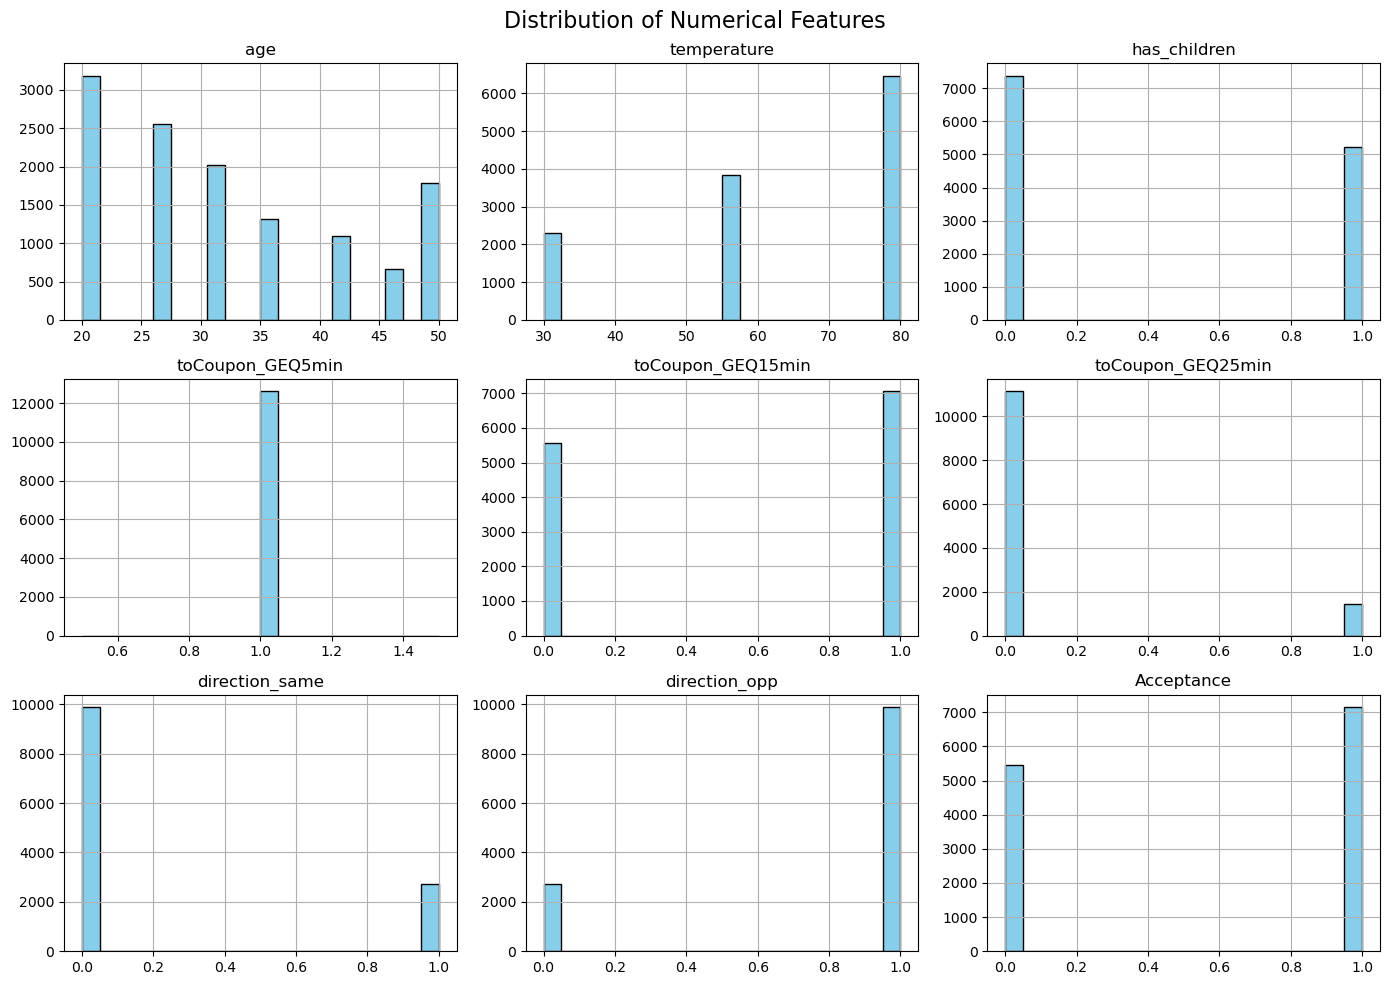

In [833]:
numerical_features = ['age','temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp','Acceptance']
dfCouponUpdated[numerical_features].hist(bins=20, figsize=(14, 10), color='skyblue', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

##### 6.1 Visualize the couponType vs gender.

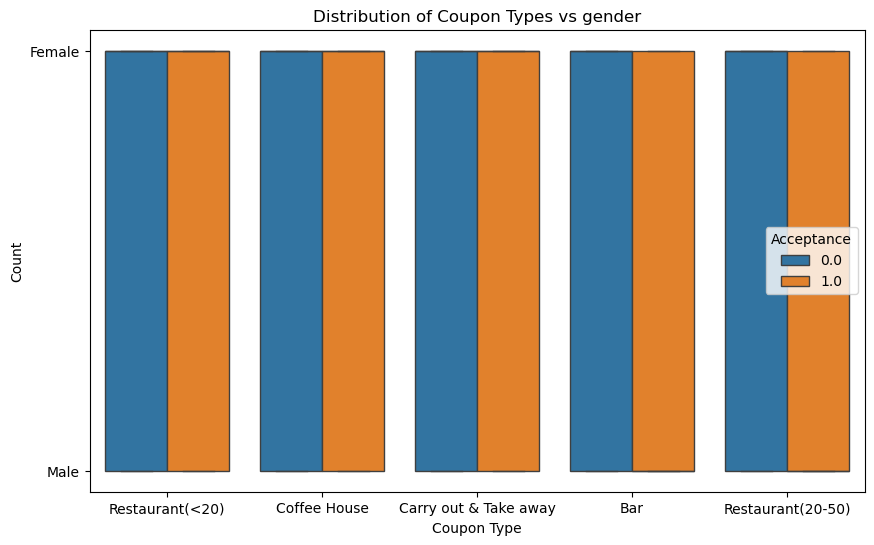

<Axes: xlabel='coupon', ylabel='gender'>

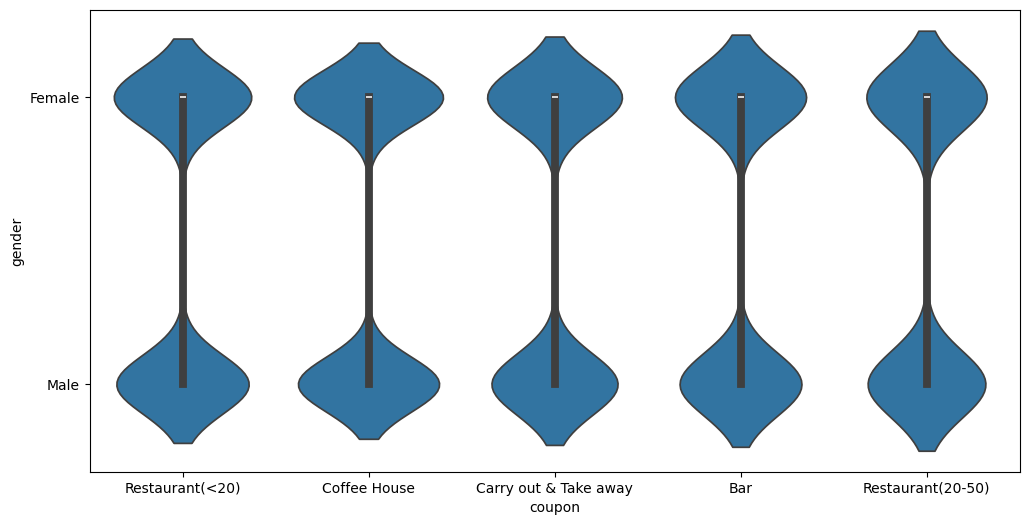

In [993]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=dfCoupons['gender'],x=dfCoupons['coupon'],hue='Acceptance', data=dfCouponUpdated)
plt.title('Distribution of Coupon Types vs gender')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='coupon', y='gender', data=dfCouponUpdated)



- Consistency Across Genders: For each activity, the distributions for Male and Female appear very similar in shape and spread.
- Uniformity in Distribution: The density for activities like "Bar" and "Coffee House" appears fairly uniform between genders, suggesting a similar engagement rate.
- Activity Engagement: The width of the violin plots indicates where most individuals fall in the distribution for a specific activity (e.g., people are more uniformly distributed in "Carry out & Take away").

##### 6.2 Use a histogram to visualize the temperature column.

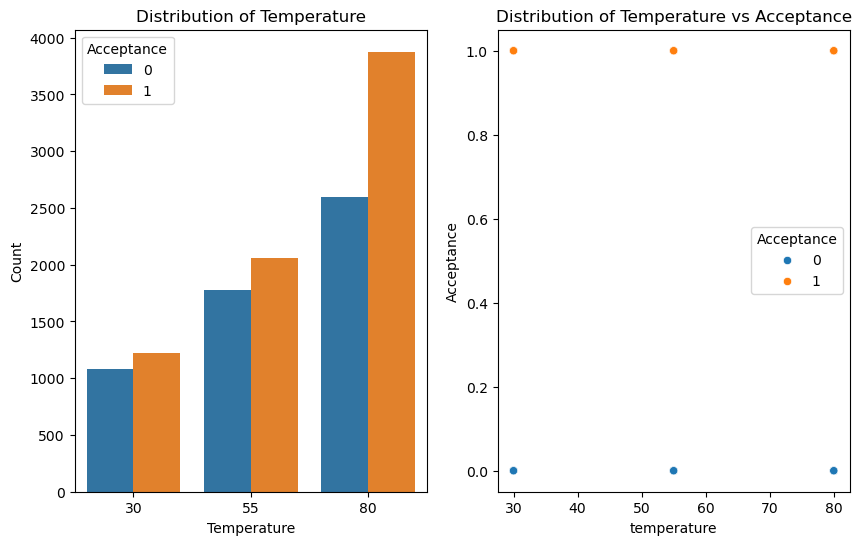

In [845]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(dfCouponUpdated,x='temperature',hue='Acceptance')
plt.title('Distribution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Count')


plt.subplot(122)
plt.title('Distribution of Temperature vs Acceptance')
sns.scatterplot(data=dfCouponUpdated, x="temperature", y="Acceptance",hue='Acceptance')
plt.show()


##### 7. Data exploration (Bar Coupon Acceptance Rate)

##### 7.1 Create a new `DataFrame` that contains just the bar coupons.

In [858]:
dfbarcoupons = dfCouponUpdated[dfCouponUpdated['coupon'] == 'Bar']

In [860]:
dfbarcoupons.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Acceptance
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


##### 7.2 Proportion of bar coupons were accepted?

In [864]:
bar_accepted_coupons = dfbarcoupons[dfbarcoupons['Acceptance'] == 1].shape[0]
bar_total_coupons = dfbarcoupons.shape[0]
bar_proportion_accepted = bar_accepted_coupons / bar_total_coupons

In [343]:
print (f"accepted coupons = {bar_accepted_coupons}\ntotal coupons = {bar_total_coupons}\nproportion_accepted = {bar_proportion_accepted}")

accepted coupons = 824
total coupons = 2010
proportion_accepted = 0.4099502487562189


##### 7.3 Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

In [866]:
dfbarcoupons1to3times = dfbarcoupons[dfbarcoupons['Bar'] == '1~3']

In [868]:
dfbarcoupons1to3times.iloc[:,:15].head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3
105,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,0,Associates degree,Student,$12500 - $24999,1~3
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,0,Bachelors degree,Student,$50000 - $62499,1~3


In [872]:
bar_accepted_coupons1to3 = dfbarcoupons1to3times[dfbarcoupons1to3times['Acceptance']==1].shape[0]

In [874]:
bar_total_coupons1to3 = dfbarcoupons1to3times.shape[0]

In [876]:
bar_proportion_coupons1to3 = bar_accepted_coupons1to3/bar_total_coupons1to3

In [396]:
print (f"accepted rate coupons 1to3 times = {bar_accepted_coupons1to3}\ntotal coupons = {bar_total_coupons1to3}\nproportion_accepted = {bar_proportion_coupons1to3}")

accepted rate coupons 1to3 times = 257
total coupons = 397
proportion_accepted = 0.6473551637279596


In [880]:
bar_accepted_coupons1to3 = dfbarcoupons1to3times[dfbarcoupons1to3times['Acceptance']==1].shape[0]

Acceptance
1    257
0    140
Name: count, dtype: int64


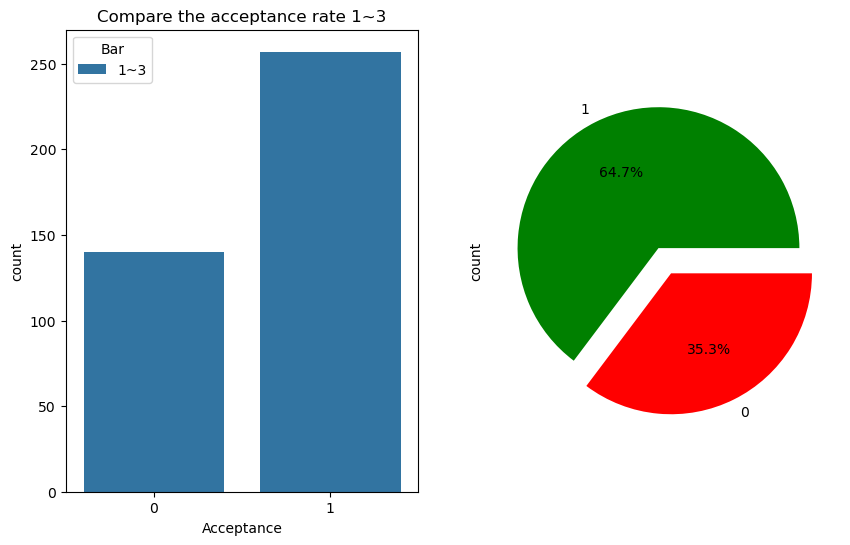

In [939]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(hue='Bar', x='Acceptance', data=dfbarcoupons1to3times)
plt.title('Compare the acceptance rate 1~3')


plt.subplot(122)
dfbarcoupons1to3times['Acceptance'].value_counts().plot(kind='pie',explode=[0.1,0.1],autopct='%1.1f%%',colors=['g','r'])
print(dfbarcoupons1to3times['Acceptance'].value_counts())
plt.show()


##### Comparing numerical data with Acceptance vs 'age','temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min', 'direction_same', 'direction_opp'

<Figure size 1000x600 with 0 Axes>

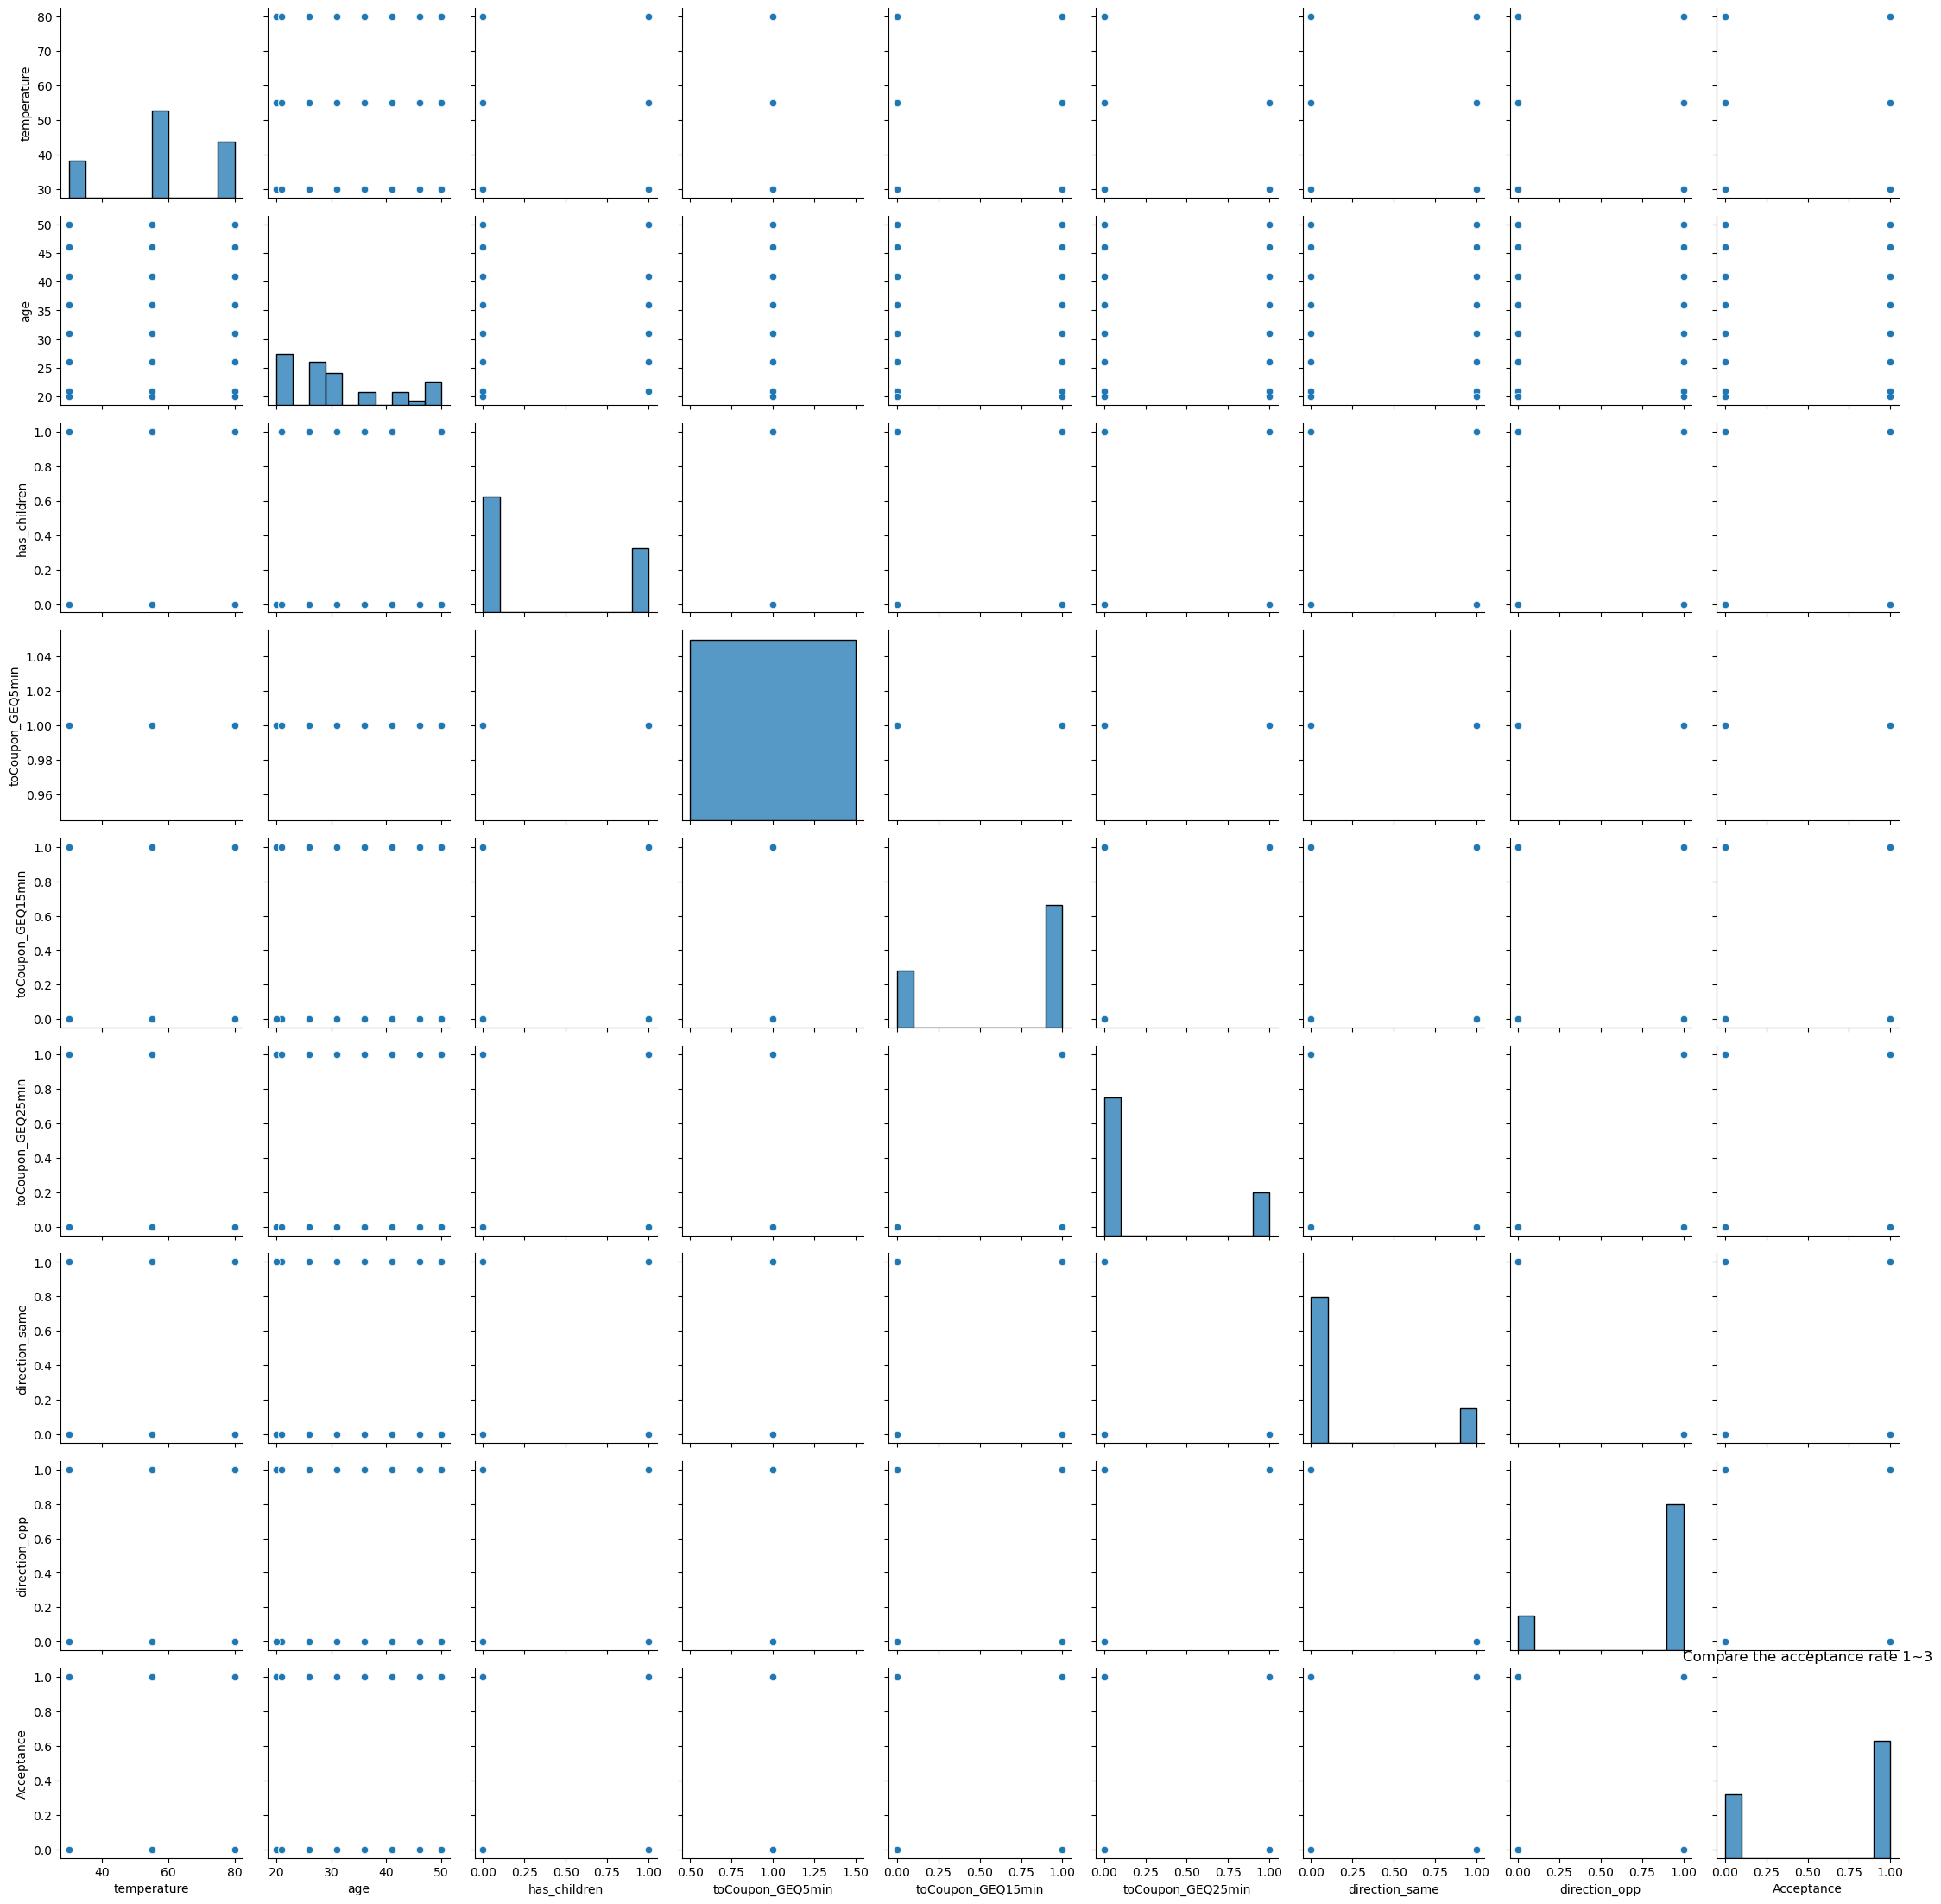

In [890]:
plt.figure(figsize=(10, 6))
g=sns.PairGrid(dfbarcoupons1to3times)
g.map_diag(sns.histplot), g.map_offdiag(sns.scatterplot)
plt.title('Compare the acceptance rate 1~3')
plt.show()

#### Hence, 

#### Age vs Acceptance

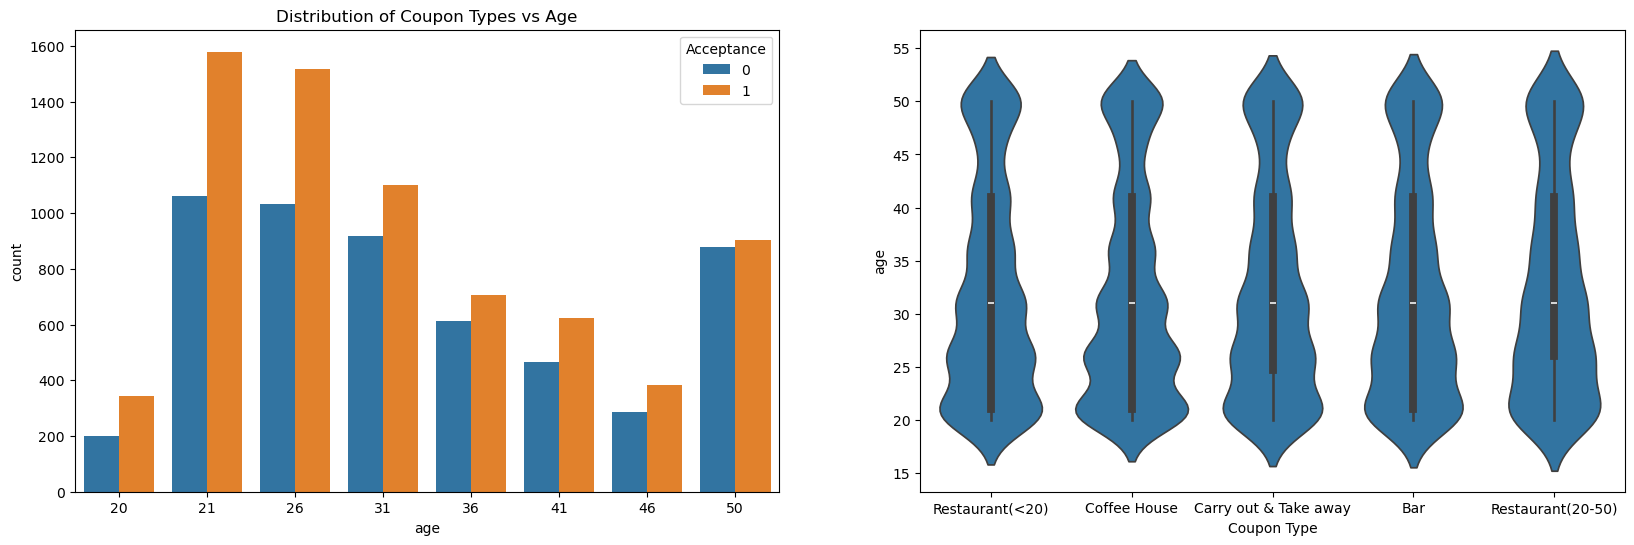

In [987]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.countplot(dfCouponUpdated,x='age',hue='Acceptance')
plt.title('Distribution of Coupon Types vs Age')

plt.subplot(122)
sns.violinplot(x='coupon', y='age', data=dfCouponUpdated)
plt.xlabel('Coupon Type')
plt.ylabel('age')
plt.show()

In [919]:
#### Passanger vs couponType

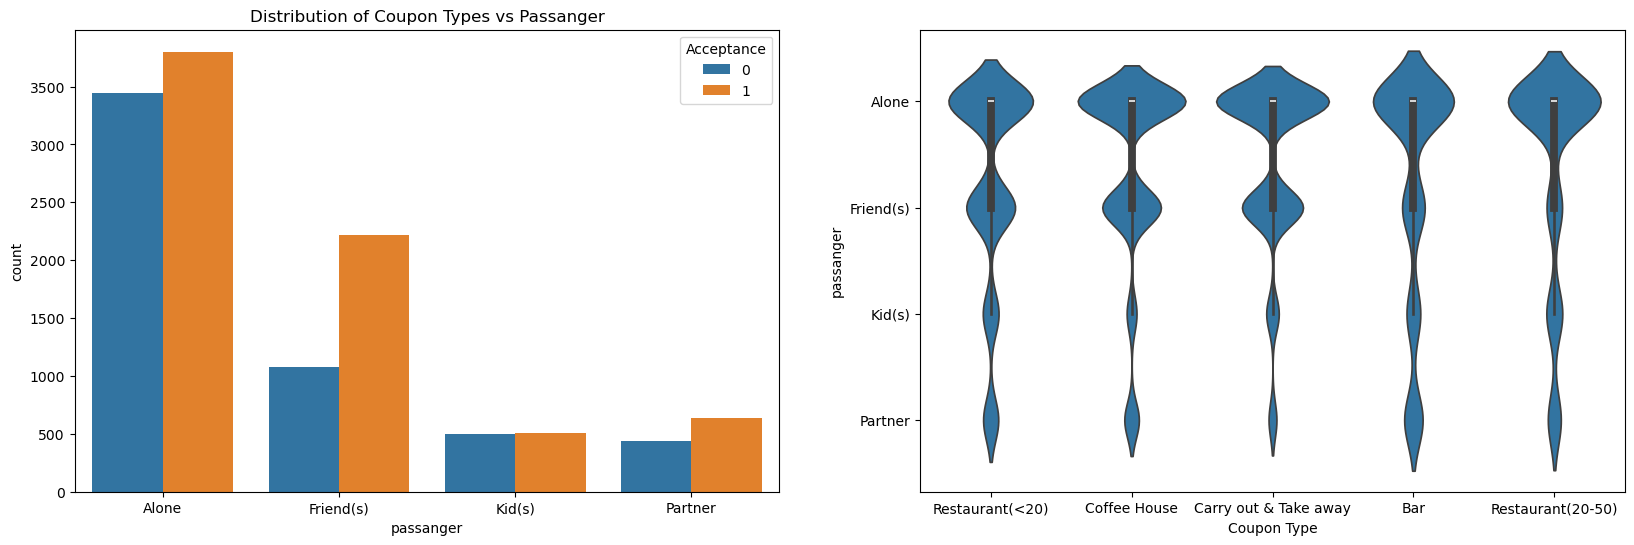

In [983]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.countplot(dfCouponUpdated,x='passanger',hue='Acceptance')
plt.title('Distribution of Coupon Types vs Passanger')

plt.subplot(122)
sns.violinplot(x='coupon', y='passanger', data=dfCouponUpdated)
plt.xlabel('Coupon Type')
plt.ylabel('passanger')
plt.show()

#### Expiration vs couponType

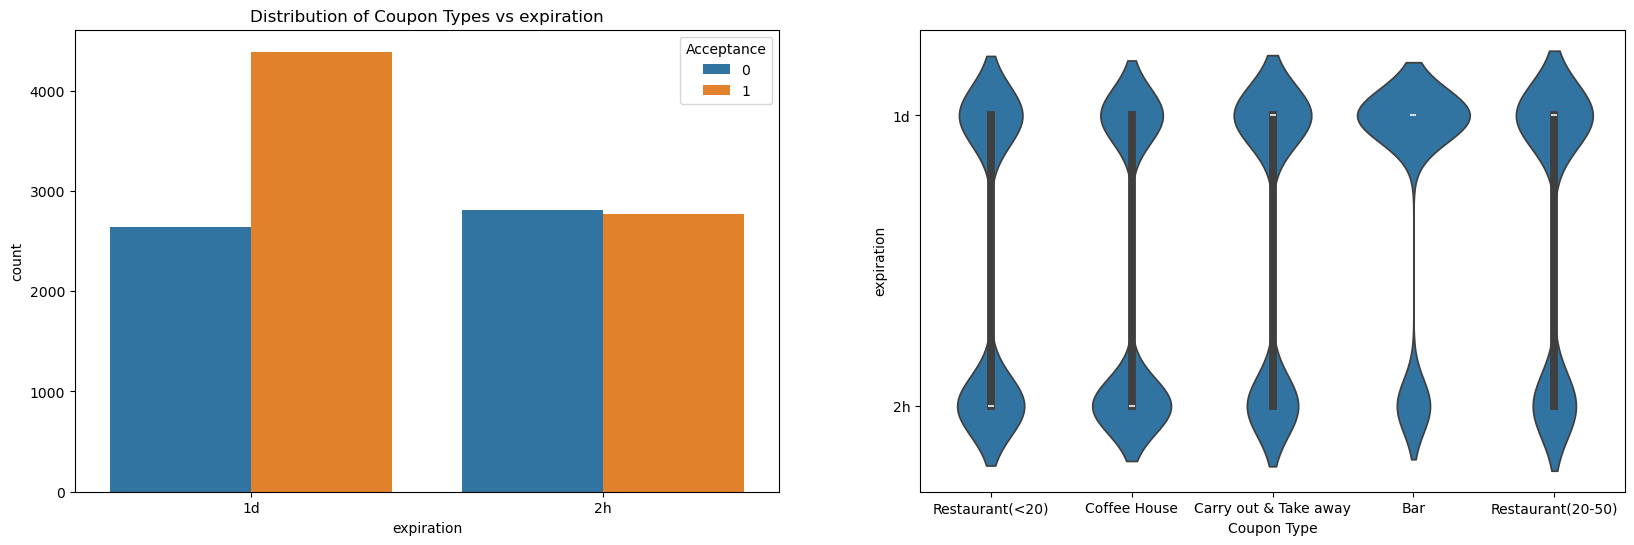

In [981]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.countplot(dfCouponUpdated,x='expiration',hue='Acceptance')
plt.title('Distribution of Coupon Types vs expiration')

#plt.figure(figsize=(12, 6))
plt.subplot(122)
sns.violinplot(x='coupon', y='expiration', data=dfCouponUpdated)
plt.xlabel('Coupon Type')
plt.ylabel('expiration')
plt.show()

#### Martial status vs coupon type

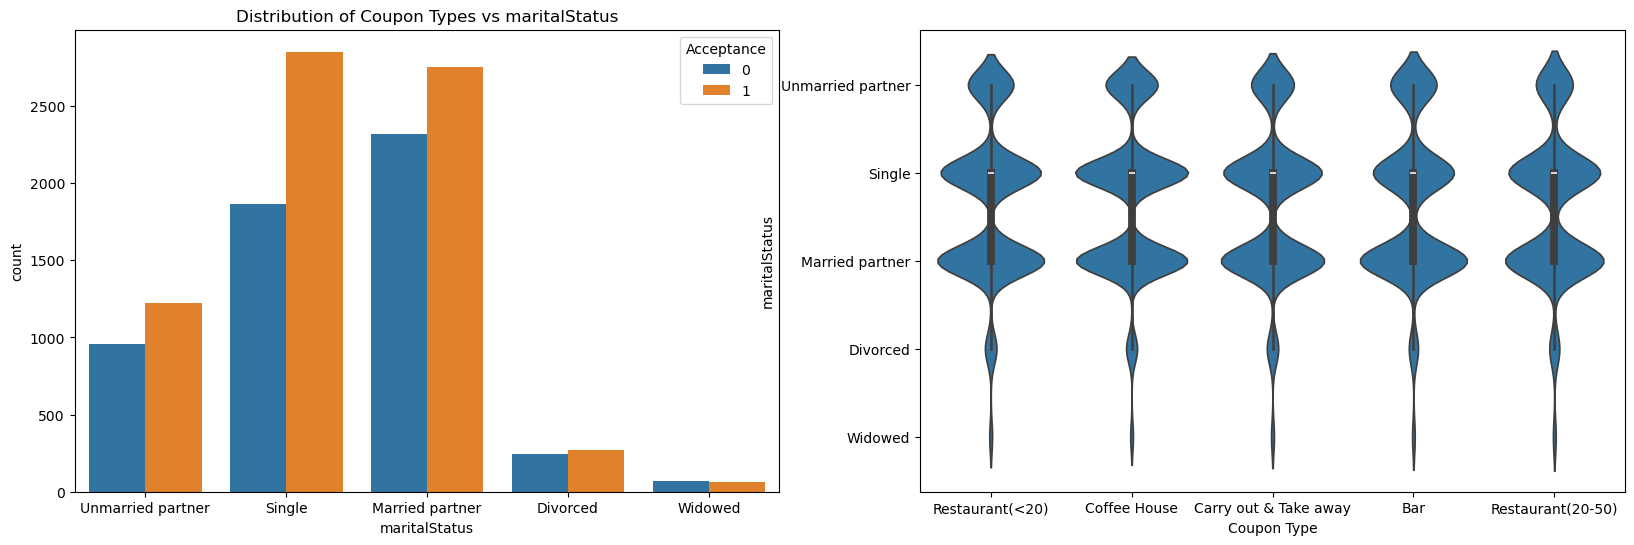

In [989]:
plt.figure(figsize=(20, 6))
plt.subplot(121)
sns.countplot(dfCouponUpdated,x='maritalStatus',hue='Acceptance')
plt.title('Distribution of Coupon Types vs maritalStatus')

plt.subplot(122)
sns.violinplot(x='coupon', y='maritalStatus', data=dfCouponUpdated)
plt.xlabel('Coupon Type')
plt.ylabel('maritalStatus')
plt.show()